2. EDA

In [ ]:
# 1. ИМПОРТ БИБЛИОТЕК
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Визуализация
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
from plotly.offline import plot

import matplotlib.pyplot as plt

In [15]:
# Настройки отображения
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [16]:
'''1. Загрузка данных'''
merged_cleaned_data = pd.read_csv('11_merged_cleaned_data.csv')

In [17]:
print(merged_cleaned_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58189 entries, 0 to 58188
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductKey         58189 non-null  int64  
 1   OrderDate          58189 non-null  object 
 2   ShipDate           58189 non-null  object 
 3   CustomerKey        58189 non-null  int64  
 4   SalesTerritoryKey  58189 non-null  int64  
 5   SalesOrderNumber   58189 non-null  object 
 6   OrderQuantity      58189 non-null  int64  
 7   UnitPrice          58189 non-null  float64
 8   TotalProductCost   58189 non-null  float64
 9   SalesAmount        58189 non-null  float64
 10  TaxAmt             58189 non-null  float64
 11  FirstName          58189 non-null  object 
 12  LastName           58189 non-null  object 
 13  FullName           58189 non-null  object 
 14  BirthDate          58189 non-null  object 
 15  MaritalStatus      58189 non-null  object 
 16  Gender             581

In [18]:
df = merged_cleaned_data


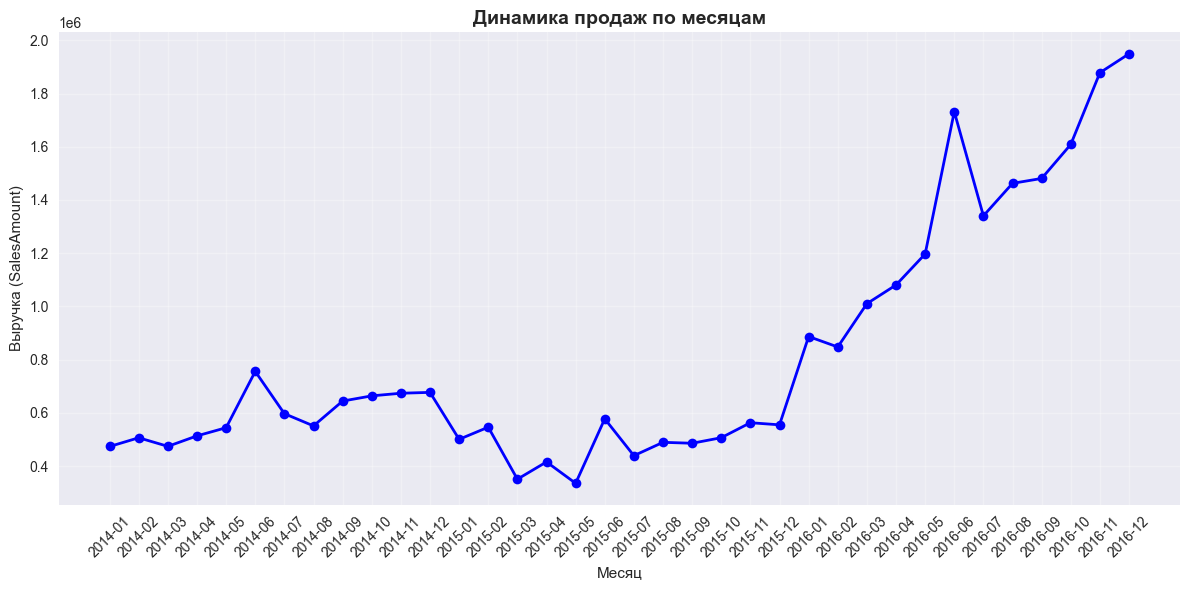

✅ Построен график: Динамика продаж по месяцам


In [19]:
# Создаем subplots
plt.figure(figsize=(12, 6))

# 1. Динамика продаж по времени (с использованием OrderMonth и OrderYear)
monthly_sales = df.groupby(['OrderYear', 'OrderMonth'])['SalesAmount'].sum().reset_index()
monthly_sales['Period'] = monthly_sales['OrderYear'].astype(str) + '-' + monthly_sales['OrderMonth'].astype(str).str.zfill(2)

plt.plot(monthly_sales['Period'], monthly_sales['SalesAmount'], 
         marker='o', linewidth=2, color='blue')
plt.title('Динамика продаж по месяцам', fontsize=14, fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('Выручка (SalesAmount)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Построен график: Динамика продаж по месяцам")

✅ Построен график: Выручка по регионам (10 регионов)


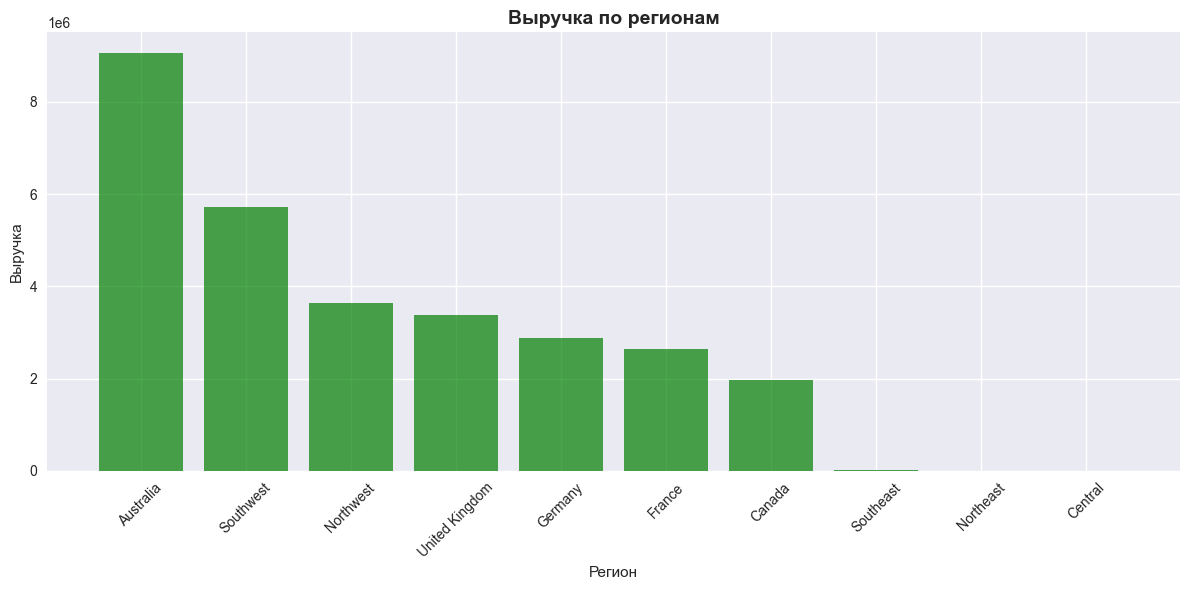

In [20]:
# Создаем subplots
plt.figure(figsize=(12, 6))

# 2. Распределение по регионам
if 'Region' in df.columns:
    region_sales = df.groupby('Region')['SalesAmount'].sum().sort_values(ascending=False)
    plt.bar(range(len(region_sales)), region_sales.values, color='green', alpha=0.7)
    plt.title('Выручка по регионам', fontsize=14, fontweight='bold')
    plt.xlabel('Регион')
    plt.ylabel('Выручка')
    plt.xticks(range(len(region_sales)), region_sales.index, rotation=45)
    print(f"✅ Построен график: Выручка по регионам ({len(region_sales)} регионов)")
else:
    plt.text(0.5, 0.5, 'Нет данных\nRegion', 
             ha='center', va='center', transform=plt.gca().transAxes, fontsize=14)
    plt.title('Выручка по регионам', fontsize=14, fontweight='bold')
    print("Пропущен график: Отсутствует Region")

plt.tight_layout()
plt.show()

✅ Построен график: Выручка по странам (6 страна)


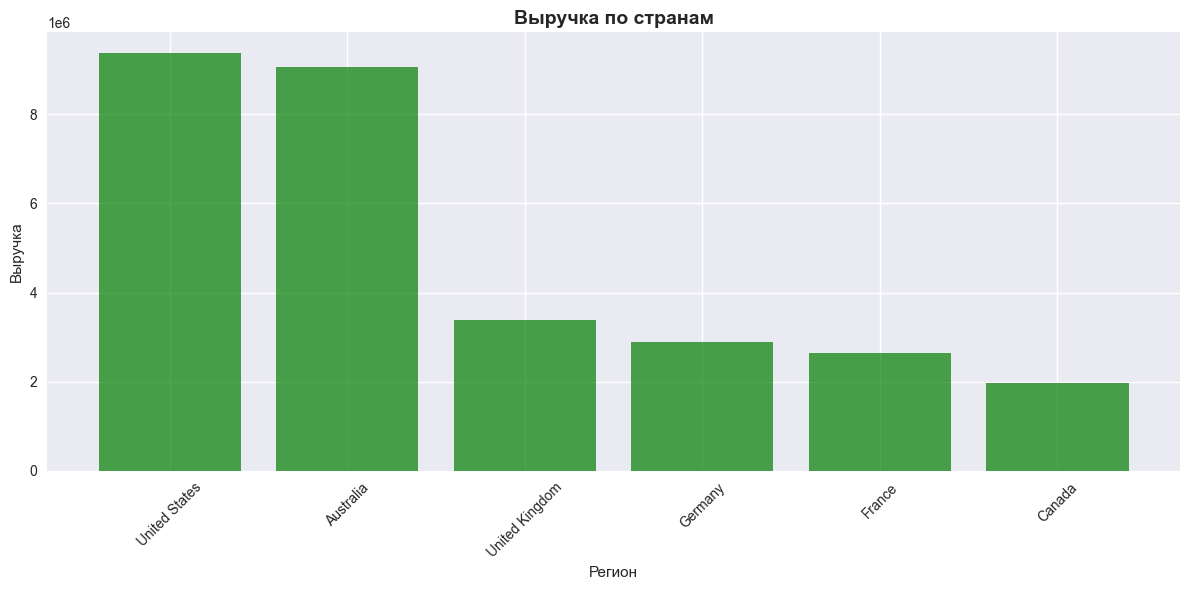

In [21]:
# Создаем subplots
plt.figure(figsize=(12, 6))

# 2. Распределение по странам
if 'Region' in df.columns:
    region_sales = df.groupby('Country')['SalesAmount'].sum().sort_values(ascending=False)
    plt.bar(range(len(region_sales)), region_sales.values, color='green', alpha=0.7)
    plt.title('Выручка по странам', fontsize=14, fontweight='bold')
    plt.xlabel('Регион')
    plt.ylabel('Выручка')
    plt.xticks(range(len(region_sales)), region_sales.index, rotation=45)
    print(f"✅ Построен график: Выручка по странам ({len(region_sales)} страна)")
else:
    plt.text(0.5, 0.5, 'Нет данных\nCountry', 
             ha='center', va='center', transform=plt.gca().transAxes, fontsize=14)
    plt.title('Выручка по странам', fontsize=14, fontweight='bold')
    print("Пропущен график: Отсутствует Country")

plt.tight_layout()
plt.show()

✅ Построена круговая диаграмма: Категории продуктов (3 категорий)


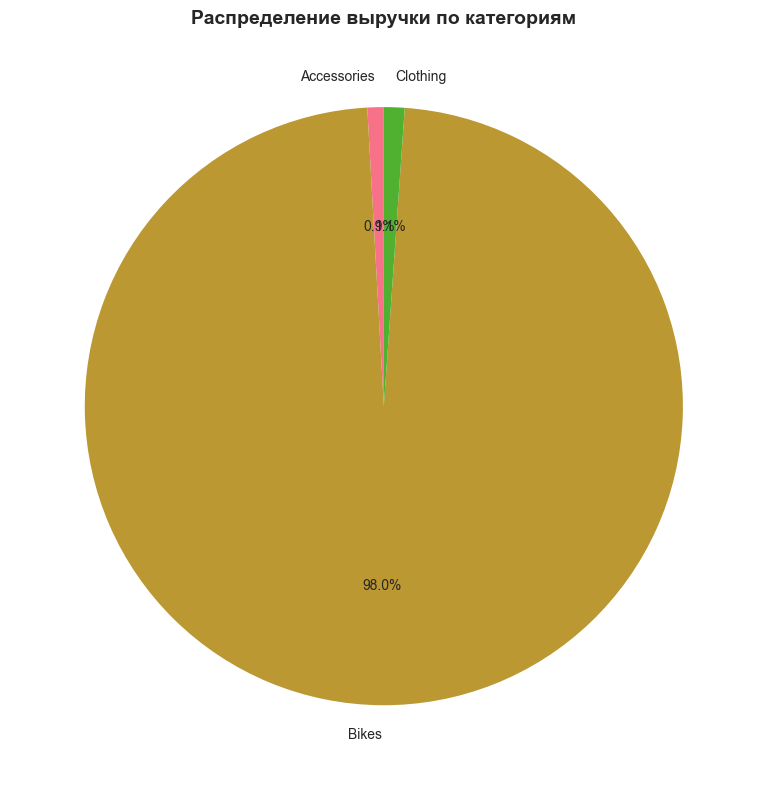

In [22]:
df = merged_cleaned_data
# Создаем subplots

# 3. Распределение по категориям продуктов (один график)
plt.figure(figsize=(8, 8))

if 'Category' in df.columns:
    category_sales = df.groupby('Category')['SalesAmount'].sum()
    plt.pie(category_sales.values, labels=category_sales.index, 
            autopct='%1.1f%%', startangle=90)
    plt.title('Распределение выручки по категориям', fontsize=14, fontweight='bold')
    print(f"✅ Построена круговая диаграмма: Категории продуктов ({len(category_sales)} категорий)")
else:
    plt.text(0.5, 0.5, 'Нет данных\nCategory', 
             ha='center', va='center', transform=plt.gca().transAxes, fontsize=14)
    plt.title('Распределение выручки по категориям', fontsize=14, fontweight='bold')
    print("❌ Пропущена диаграмма: Отсутствует Category")

plt.tight_layout()
plt.show()

✅ Построен график: Динамика продаж по месяцам
✅ Построен график: Выручка по регионам (10 регионов)
✅ Построена круговая диаграмма: Категории продуктов (3 категорий)


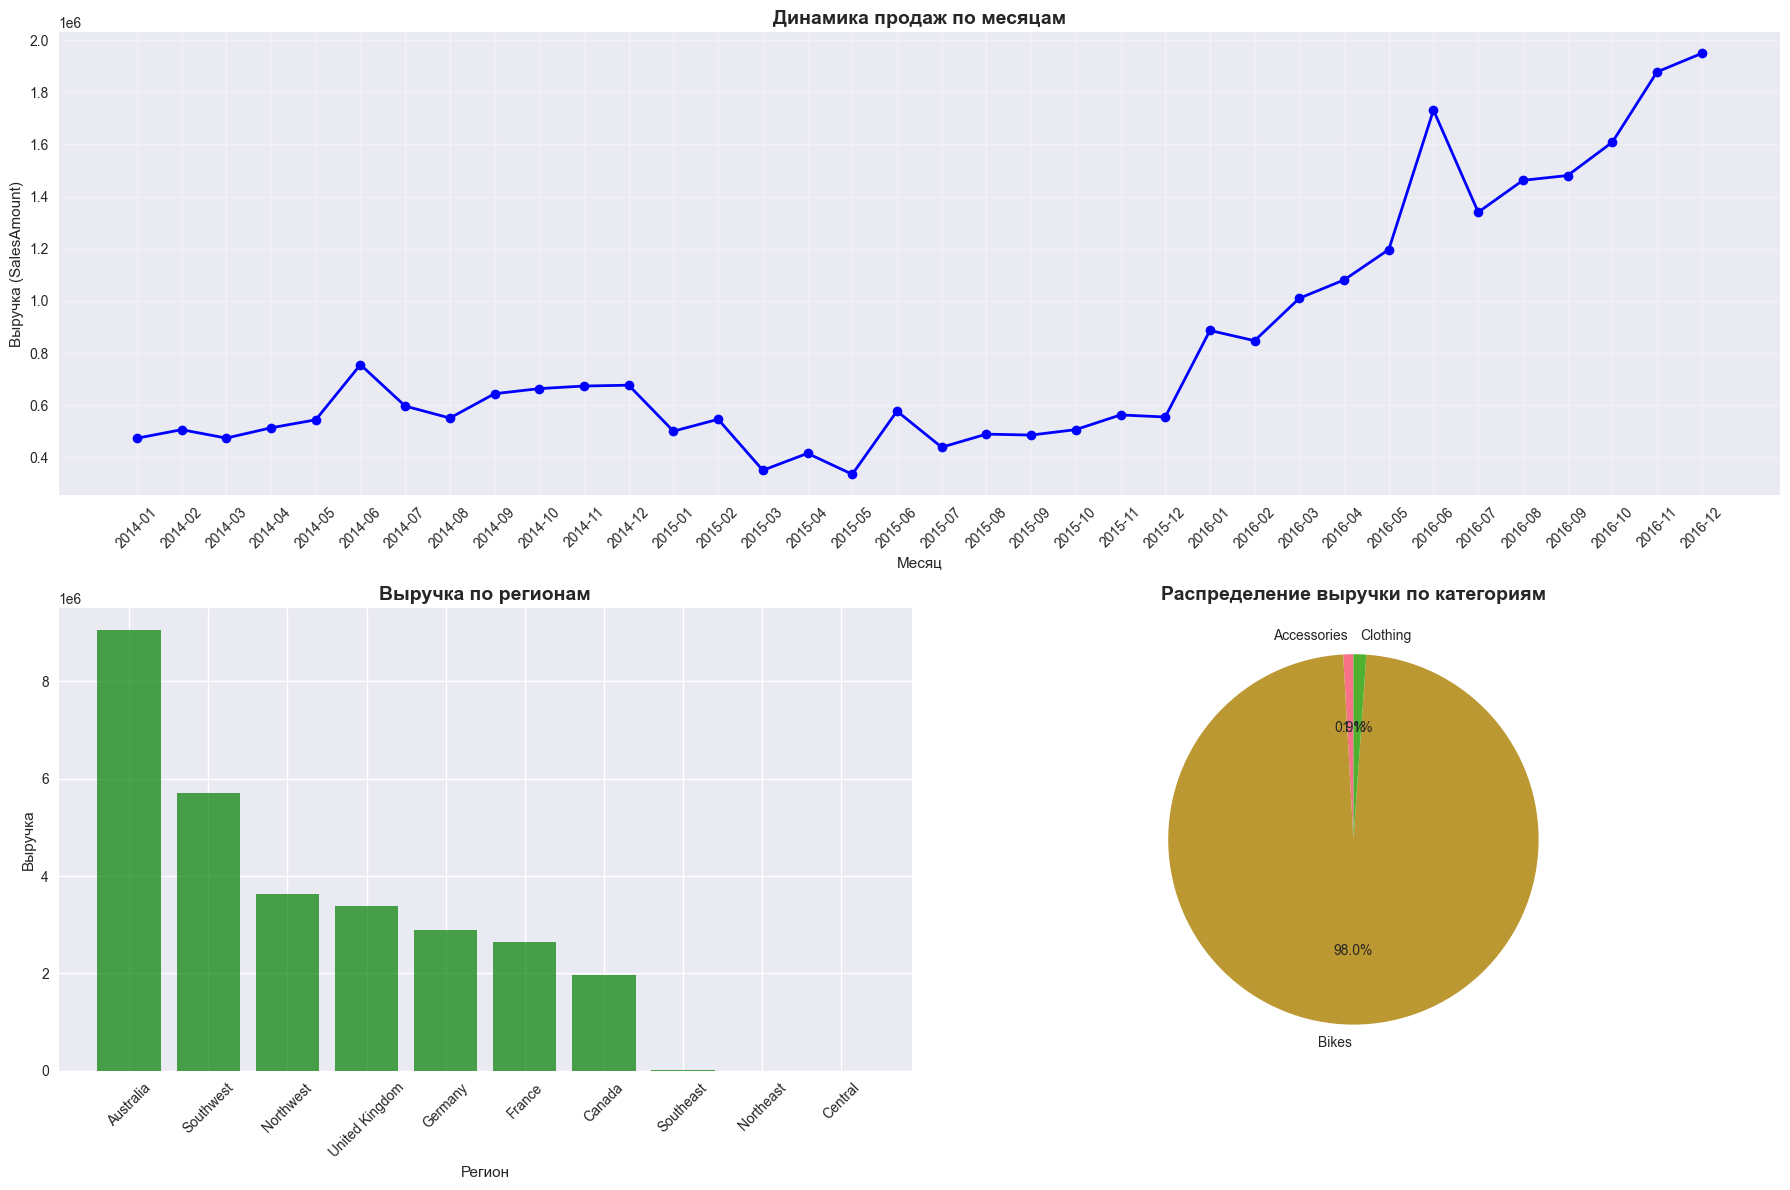

In [23]:
df = merged_cleaned_data

# Создаем subplots
# fig, axes = plt.subplots(2, 3, figsize=(18, 12))
# print("✅ Создана сетка графиков 2x3")

# Создаем сетку: 2 строки, 2 колонки
fig = plt.figure(figsize=(18, 12))

# 1. Динамика продаж по времени (занимает всю ширину первой строки)
ax1 = plt.subplot(2, 2, (1, 2))  # индексы (1, 2) — от первой до второй ячейки в первой строке

monthly_sales = df.groupby(['OrderYear', 'OrderMonth'])['SalesAmount'].sum().reset_index()
monthly_sales['Period'] = monthly_sales['OrderYear'].astype(str) + '-' + monthly_sales['OrderMonth'].astype(str).str.zfill(2)

ax1.plot(monthly_sales['Period'], monthly_sales['SalesAmount'], 
         marker='o', linewidth=2, color='blue')
ax1.set_title('Динамика продаж по месяцам', fontsize=14, fontweight='bold')
ax1.set_xlabel('Месяц')
ax1.set_ylabel('Выручка (SalesAmount)')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)
print("✅ Построен график: Динамика продаж по месяцам")

# 2. Выручка по регионам (вторая ячейка второй строки)
ax2 = plt.subplot(2, 2, 3)  # третья ячейка сетки

if 'Region' in df.columns:
    region_sales = df.groupby('Region')['SalesAmount'].sum().sort_values(ascending=False)
    ax2.bar(range(len(region_sales)), region_sales.values, color='green', alpha=0.7)
    ax2.set_title('Выручка по регионам', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Регион')
    ax2.set_ylabel('Выручка')
    ax2.set_xticks(range(len(region_sales)))
    ax2.set_xticklabels(region_sales.index, rotation=45)
    print(f"✅ Построен график: Выручка по регионам ({len(region_sales)} регионов)")
else:
    ax2.text(0.5, 0.5, 'Нет данных\nRegion', 
             ha='center', va='center', transform=ax2.transAxes)
    ax2.set_title('Выручка по регионам', fontsize=14, fontweight='bold')
    print("❌ Пропущен график: Отсутствует Region")

# 3. Распределение по категориям (четвёртая ячейка второй строки)
ax3 = plt.subplot(2, 2, 4)  # четвёртая ячейка сетки

if 'Category' in df.columns:
    category_sales = df.groupby('Category')['SalesAmount'].sum()
    ax3.pie(category_sales.values, labels=category_sales.index, 
            autopct='%1.1f%%', startangle=90)
    ax3.set_title('Распределение выручки по категориям', fontsize=14, fontweight='bold')
    print(f"✅ Построена круговая диаграмма: Категории продуктов ({len(category_sales)} категорий)")
else:
    ax3.text(0.5, 0.5, 'Нет данных\nCategory', 
             ha='center', va='center', transform=ax3.transAxes)
    ax3.set_title('Распределение выручки по категориям', fontsize=14, fontweight='bold')
    print("❌ Пропущена диаграмма: Отсутствует Category")

plt.tight_layout()
plt.show()

✅ Построен график: Динамика продаж по годам


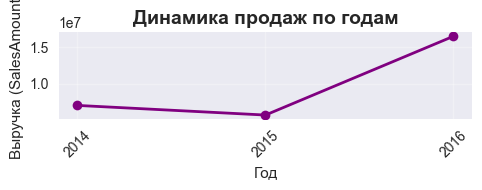

In [24]:
df = merged_cleaned_data

# Создаем один график
plt.figure(figsize=(5, 2))

# 1. Динамика продаж по годам
if 'OrderYear' in df.columns and 'SalesAmount' in df.columns:
    yearly_sales = df.groupby('OrderYear')['SalesAmount'].sum()
    
    plt.plot(yearly_sales.index, yearly_sales.values, 
             marker='o', linewidth=2, color='purple')
    plt.title('Динамика продаж по годам', fontsize=14, fontweight='bold')
    plt.xlabel('Год')
    plt.ylabel('Выручка (SalesAmount)')
    plt.xticks(yearly_sales.index, rotation=45)  # подписи по оси X — года
    plt.grid(True, alpha=0.3)
    print("✅ Построен график: Динамика продаж по годам")
else:
    plt.text(0.5, 0.5, 'Нет данных\nOrderYear или SalesAmount', 
             ha='center', va='center', transform=plt.gca().transAxes, fontsize=14)
    plt.title('Динамика продаж по годам', fontsize=14, fontweight='bold')
    print("❌ Пропущен график: Отсутствуют OrderYear или SalesAmount")

plt.tight_layout()
plt.show()

✅ Построена гистограмма: Распределение доходов клиентов
✅ Построена гистограмма: Распределение суммы продаж
✅ Построен барчарт: Топ-10 продуктов по выручке


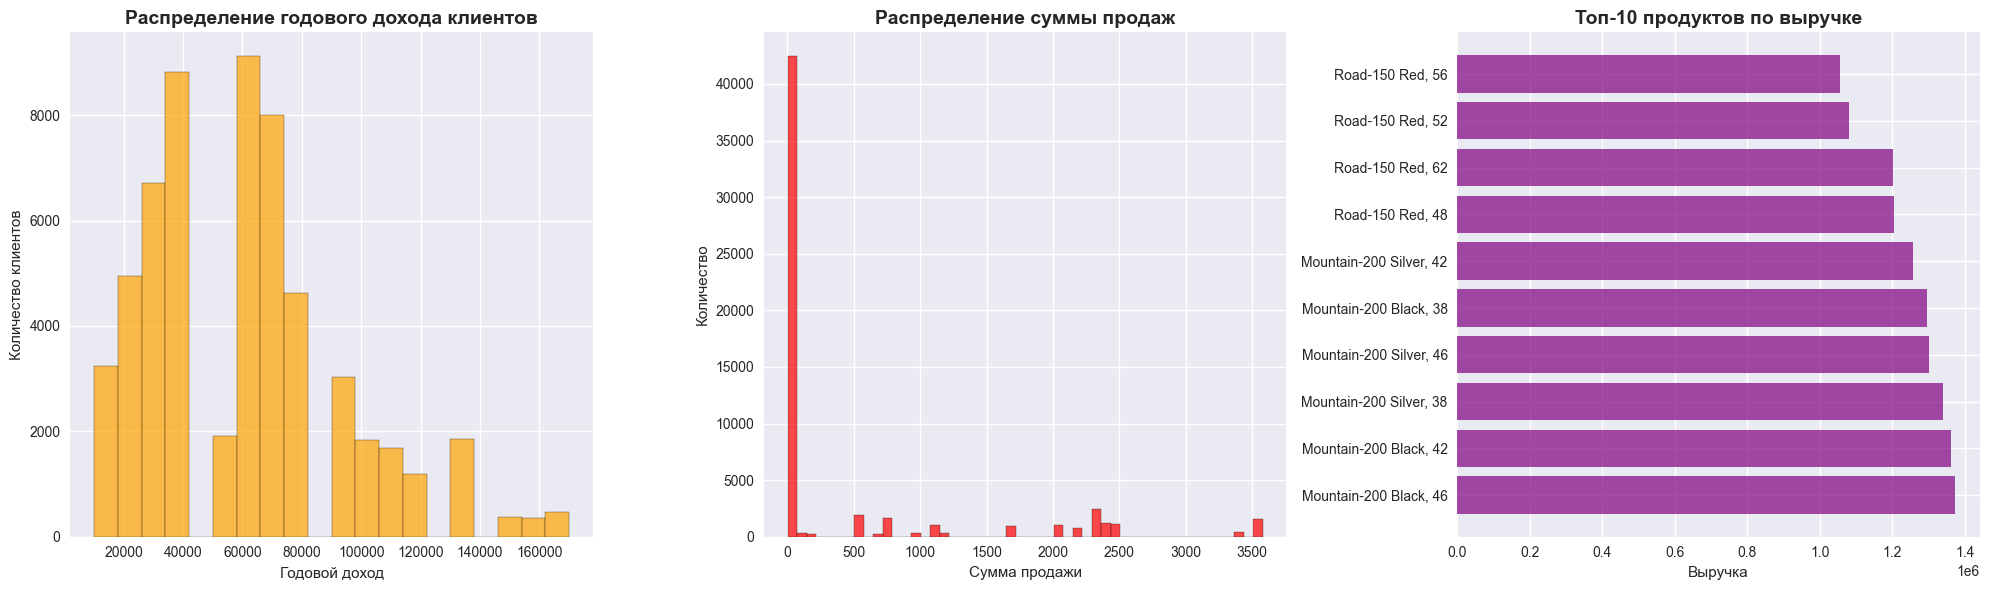

In [25]:
df = merged_cleaned_data

# Создаем сетку: 1 строка, 3 колонки
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 4. Распределение доходов клиентов
if 'YearlyIncome' in df.columns:
    axes[0].hist(df['YearlyIncome'], bins=20, alpha=0.7, edgecolor='black', color='orange')
    axes[0].set_title('Распределение годового дохода клиентов', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Годовой доход')
    axes[0].set_ylabel('Количество клиентов')
    print("✅ Построена гистограмма: Распределение доходов клиентов")
else:
    axes[0].text(0.5, 0.5, 'Нет данных\nYearlyIncome', 
                 ha='center', va='center', transform=axes[0].transAxes)
    axes[0].set_title('Распределение годового дохода клиентов', fontsize=14, fontweight='bold')
    print("❌ Пропущена гистограмма: Отсутствует YearlyIncome")

# 5. Распределение суммы продаж
if 'SalesAmount' in df.columns:
    axes[1].hist(df['SalesAmount'], bins=50, alpha=0.7, edgecolor='black', color='red')
    axes[1].set_title('Распределение суммы продаж', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Сумма продажи')
    axes[1].set_ylabel('Количество')
    print("✅ Построена гистограмма: Распределение суммы продаж")
else:
    axes[1].text(0.5, 0.5, 'Нет данных\nSalesAmount', 
                 ha='center', va='center', transform=axes[1].transAxes)
    axes[1].set_title('Распределение суммы продаж', fontsize=14, fontweight='bold')
    print("❌ Пропущена гистограмма: Отсутствует SalesAmount")

# 6. Топ продуктов по выручке
if 'ProductName' in df.columns:
    top_products = df.groupby('ProductName')['SalesAmount'].sum().nlargest(10)
    axes[2].barh(range(len(top_products)), top_products.values, color='purple', alpha=0.7)
    axes[2].set_yticks(range(len(top_products)))
    axes[2].set_yticklabels([label[:25] + '...' if len(label) > 25 else label 
                             for label in top_products.index])
    axes[2].set_title('Топ-10 продуктов по выручке', fontsize=14, fontweight='bold')
    axes[2].set_xlabel('Выручка')
    print(f"✅ Построен барчарт: Топ-10 продуктов по выручке")
else:
    axes[2].text(0.5, 0.5, 'Нет данных\nProductName', 
                 ha='center', va='center', transform=axes[2].transAxes)
    axes[2].set_title('Топ-10 продуктов по выручке', fontsize=14, fontweight='bold')
    print("❌ Пропущен барчарт: Отсутствует ProductName")

plt.tight_layout()
plt.show()

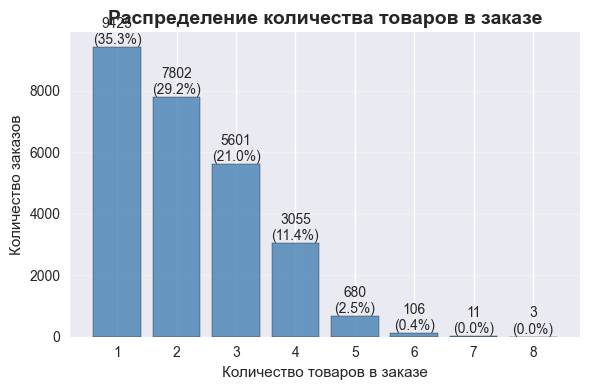

✅ Построен график: Распределение количества товаров в заказе


In [26]:
# Группируем по номеру заказа и считаем количество товаров в каждом заказе
order_item_count = df.groupby('SalesOrderNumber').size().reset_index(name='ItemsPerOrder')

# Считаем частоту каждого количества товаров
item_count_freq = order_item_count['ItemsPerOrder'].value_counts().sort_index()

# Рассчитываем проценты
total_orders = item_count_freq.sum()
percentages = (item_count_freq / total_orders * 100).round(1)

# Создаем график
plt.figure(figsize=(6, 4))

bars = plt.bar(item_count_freq.index, item_count_freq.values, 
               color='steelblue', alpha=0.8, edgecolor='black')

# Подписи над столбцами: абсолютное значение и процент
for i, (count, pct) in enumerate(zip(item_count_freq.values, percentages)):
    plt.text(i + 1, count + 0.1, f"{count}\n({pct}%)", 
             ha='center', va='bottom', fontsize=10)

plt.title('Распределение количества товаров в заказе', fontsize=14, fontweight='bold')
plt.xlabel('Количество товаров в заказе')
plt.ylabel('Количество заказов')
plt.xticks(item_count_freq.index)  # чтобы были только целые числа
plt.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Построен график: Распределение количества товаров в заказе")

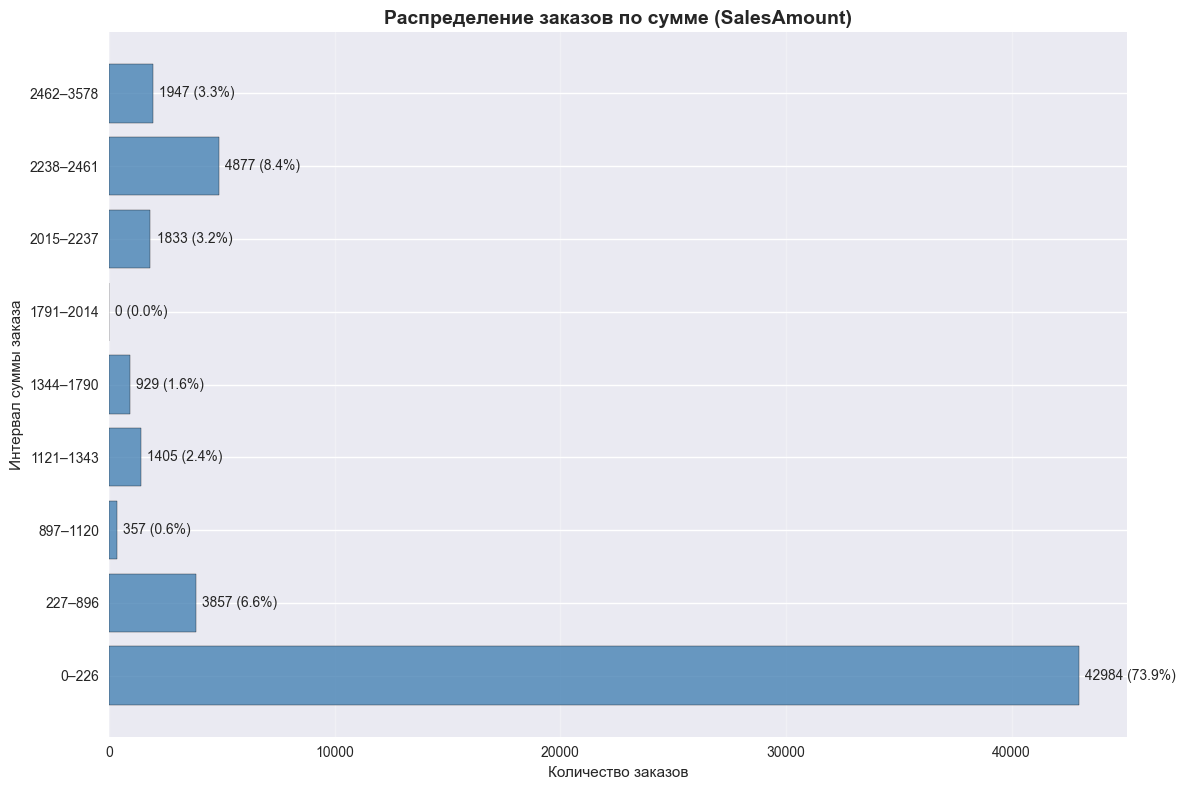

✅ Построен график: Распределение заказов по сумме


In [27]:
# Убедимся, что SalesAmount числовая
df['SalesAmount'] = pd.to_numeric(df['SalesAmount'], errors='coerce')

# Определим интервалы (биньи) — как в вашей таблице
bins = [0, 226, 896, 1120, 1343, 1790, 2014, 2237, 2461, 3578.27]

# Создаем метки для интервалов
labels = [
    '0–226',
    '227–896',
    '897–1120',
    '1121–1343',
    '1344–1790',
    '1791–2014',
    '2015–2237',
    '2238–2461',
    '2462–3578'
]

# Группируем по интервалам
df['SalesAmountBin'] = pd.cut(df['SalesAmount'], bins=bins, labels=labels, right=True)

# Считаем частоту
bin_counts = df['SalesAmountBin'].value_counts().sort_index()

# Рассчитываем проценты
total_orders = bin_counts.sum()
percentages = (bin_counts / total_orders * 100).round(1)

# Горизонтальный график
plt.figure(figsize=(12, 8))

bars = plt.barh(bin_counts.index, bin_counts.values, 
                color='steelblue', alpha=0.8, edgecolor='black')

# Подписи над столбцами
for i, (count, pct) in enumerate(zip(bin_counts.values, percentages)):
    plt.text(count + 100, i, f" {count} ({pct}%)", va='center', fontsize=10)

plt.title('Распределение заказов по сумме (SalesAmount)', fontsize=14, fontweight='bold')
plt.xlabel('Количество заказов')
plt.ylabel('Интервал суммы заказа')
plt.grid(True, axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Построен график: Распределение заказов по сумме")

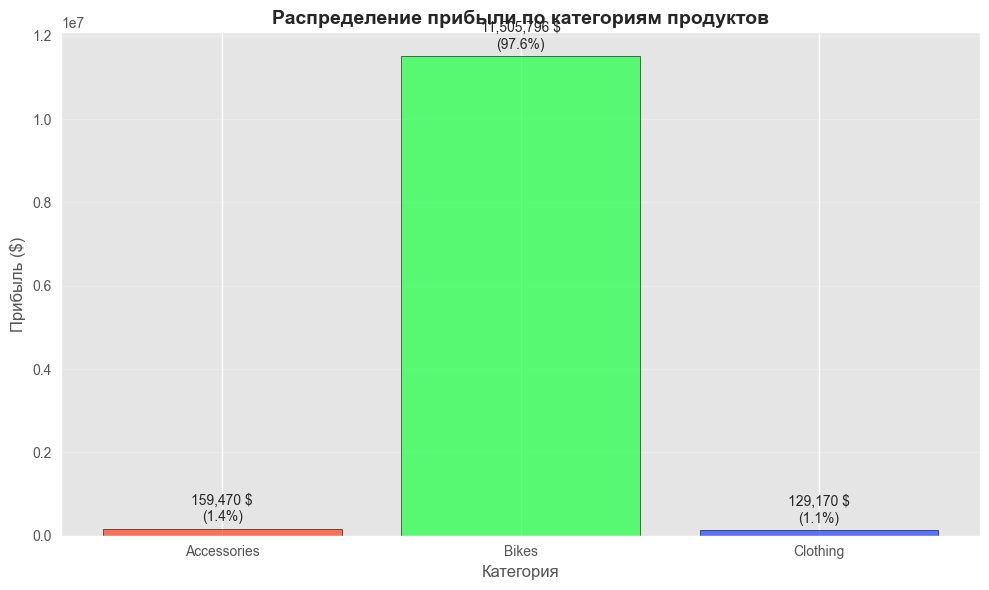

✅ Построен столбчатый график: Прибыль по категориям


In [43]:
# Убедимся, что Profit числовая
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

# Группируем по Category и суммируем Profit
category_profit = df.groupby('Category')['Profit'].sum().reset_index()
category_profit['Profit'] = category_profit['Profit'].round(2)
category_profit['Percentage'] = (category_profit['Profit'] / category_profit['Profit'].sum() * 100).round(1)

# Цвета
colors = ['#FF5733', '#33FF57', '#3357FF']

# Столбчатый график
plt.figure(figsize=(10, 6))

bars = plt.bar(category_profit['Category'], category_profit['Profit'], 
               color=colors, alpha=0.8, edgecolor='black')

# Подписи над столбцами
for i, (profit, pct) in enumerate(zip(category_profit['Profit'], category_profit['Percentage'])):
    plt.text(i, profit + max(category_profit['Profit']) * 0.01, 
             f"{int(profit):,} $\n({pct}%)", 
             ha='center', va='bottom', fontsize=10)

plt.title('Распределение прибыли по категориям продуктов', fontsize=14, fontweight='bold')
plt.xlabel('Категория')
plt.ylabel('Прибыль ($)')
plt.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Построен столбчатый график: Прибыль по категориям")

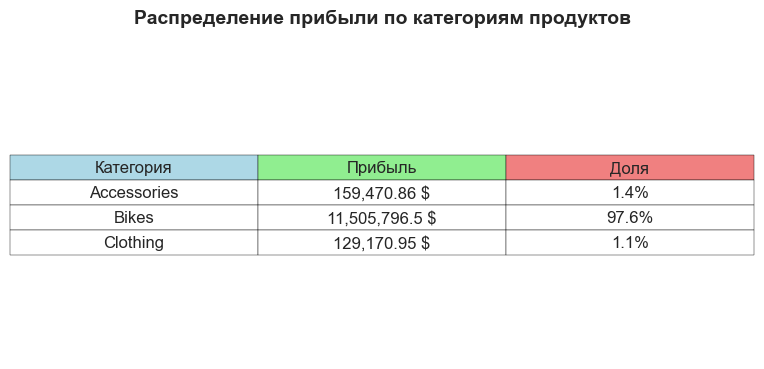

✅ Построена табличная визуализация: Прибыль по категориям


In [31]:
# Убедимся, что Profit числовая
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

# Группируем по Category и суммируем Profit
category_profit = df.groupby('Category')['Profit'].sum().reset_index()
category_profit['Profit'] = category_profit['Profit'].round(2)
category_profit['Percentage'] = (category_profit['Profit'] / category_profit['Profit'].sum() * 100).round(1)

# Подготовим данные для таблицы
table_data = []
for _, row in category_profit.iterrows():
    table_data.append([row['Category'], f"{row['Profit']:,} $", f"{row['Percentage']}%"])

# Создаем табличный график
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')

# Создаем таблицу
table = ax.table(cellText=table_data,
                 colLabels=['Категория', 'Прибыль', 'Доля'],
                 cellLoc='center',
                 loc='center',
                 colColours=['lightblue', 'lightgreen', 'lightcoral'])

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)

plt.title('Распределение прибыли по категориям продуктов', fontsize=14, fontweight='bold', pad=20)
plt.show()

print("✅ Построена табличная визуализация: Прибыль по категориям")

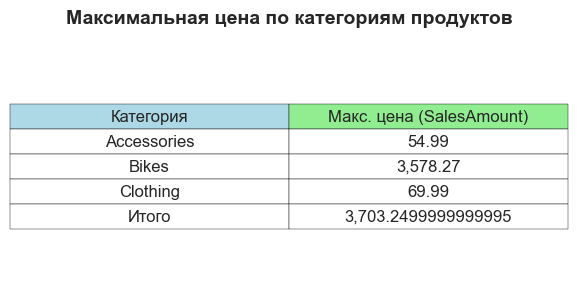

✅ Построена табличная визуализация: Максимальная цена по категориям


In [34]:
# # Убедимся, что ListPrice числовая
# df['ListPrice'] = pd.to_numeric(df['ListPrice'], errors='coerce')

# Группируем по Category и находим максимальный ListPrice
category_max_price = df.groupby('Category')['SalesAmount'].max().reset_index()
category_max_price['SalesAmount'] = category_max_price['SalesAmount'].round(2)

# Добавляем строку "Итого" — если нужно (в вашем примере это максимум, но можно сделать сумму)
total_row = pd.DataFrame({
    'Category': ['Итого'],
    'SalesAmount': [category_max_price['SalesAmount'].sum()]
})

# Объединяем
table_data = pd.concat([category_max_price, total_row], ignore_index=True)

# Подготовка данных для таблицы
table_data_formatted = []
for _, row in table_data.iterrows():
    if row['Category'] == 'Итого':
        table_data_formatted.append([row['Category'], f"{row['SalesAmount']:,}"])
    else:
        table_data_formatted.append([row['Category'], f"{row['SalesAmount']:,}"])

# Создаем табличный график
fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('tight')
ax.axis('off')

# Создаем таблицу
table = ax.table(cellText=table_data_formatted,
                 colLabels=['Категория', 'Макс. цена (SalesAmount)'],
                 cellLoc='center',
                 loc='center',
                 colColours=['lightblue', 'lightgreen'])

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)

plt.title('Максимальная цена по категориям продуктов', fontsize=14, fontweight='bold', pad=20)
plt.show()

print("✅ Построена табличная визуализация: Максимальная цена по категориям")

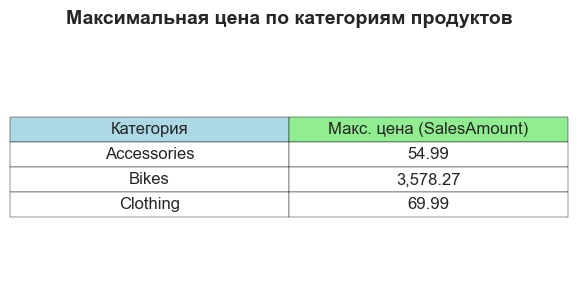

✅ Построена табличная визуализация: Максимальная цена по категориям


In [36]:
# Убедимся, что ListPrice числовая
df['SalesAmount'] = pd.to_numeric(df['SalesAmount'], errors='coerce')

# Группируем по Category и находим максимальный SalesAmount
category_max_price = df.groupby('Category')['SalesAmount'].max().reset_index()
category_max_price['SalesAmount'] = category_max_price['SalesAmount'].round(2)

# Подготовка данных для таблицы
table_data_formatted = []
for _, row in category_max_price.iterrows():
    table_data_formatted.append([row['Category'], f"{row['SalesAmount']:,}"])

# Создаем табличный график
fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('tight')
ax.axis('off')

# Создаем таблицу
table = ax.table(cellText=table_data_formatted,
                 colLabels=['Категория', 'Макс. цена (SalesAmount)'],
                 cellLoc='center',
                 loc='center',
                 colColours=['lightblue', 'lightgreen'])

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)

plt.title('Максимальная цена по категориям продуктов', fontsize=14, fontweight='bold', pad=20)
plt.show()

print("✅ Построена табличная визуализация: Максимальная цена по категориям")

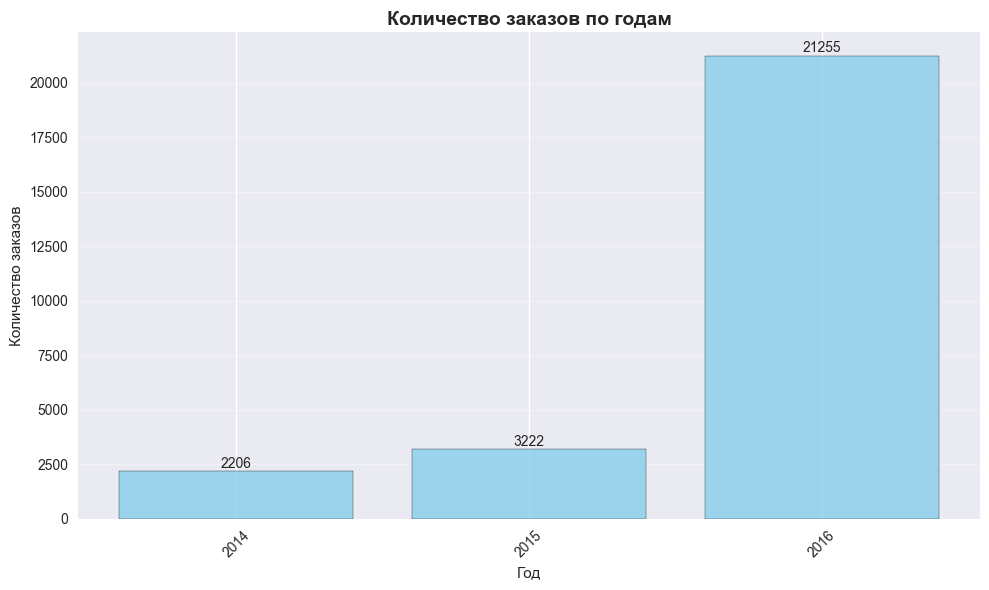

✅ Построен график: Количество заказов по годам


In [37]:
# Убедимся, что OrderYear числовая
df['OrderYear'] = pd.to_numeric(df['OrderYear'], errors='coerce')

# Считаем количество заказов по годам
orders_by_year = df.groupby('OrderYear')['SalesOrderNumber'].nunique().reset_index()
orders_by_year.columns = ['OrderYear', 'OrderCount']

# Сортируем по году (на всякий случай)
orders_by_year = orders_by_year.sort_values('OrderYear')

# Строим столбчатый график
plt.figure(figsize=(10, 6))

bars = plt.bar(orders_by_year['OrderYear'], orders_by_year['OrderCount'], 
               color='skyblue', alpha=0.8, edgecolor='black')

# Подписываем столбцы
for i, (year, count) in enumerate(zip(orders_by_year['OrderYear'], orders_by_year['OrderCount'])):
    plt.text(year, count + 10, f"{int(count)}", ha='center', va='bottom', fontsize=10)

plt.title('Количество заказов по годам', fontsize=14, fontweight='bold')
plt.xlabel('Год')
plt.ylabel('Количество заказов')
plt.xticks(orders_by_year['OrderYear'], rotation=45)
plt.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Построен график: Количество заказов по годам")

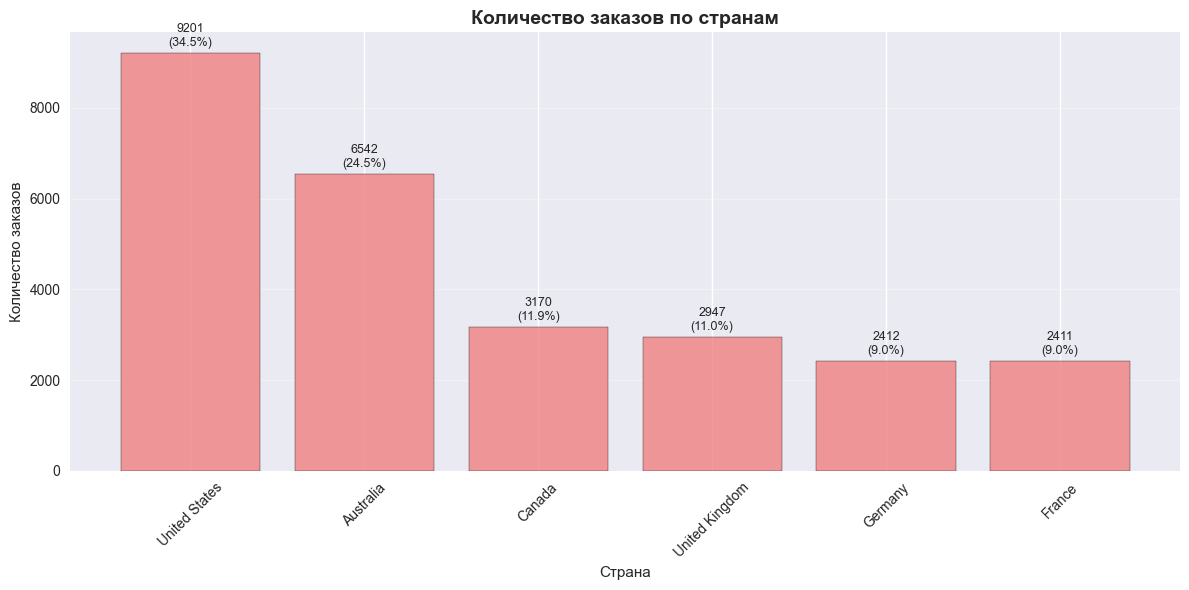

✅ Построен график: Количество заказов по странам


In [38]:
# Убедимся, что Country есть в данных
if 'Country' in df.columns and 'SalesOrderNumber' in df.columns:
    # Считаем количество заказов по странам
    orders_by_country = df.groupby('Country')['SalesOrderNumber'].nunique().reset_index()
    orders_by_country.columns = ['Country', 'OrderCount']

    # Считаем общее количество заказов
    total_orders = orders_by_country['OrderCount'].sum()

    # Добавляем процент
    orders_by_country['Percentage'] = (orders_by_country['OrderCount'] / total_orders * 100).round(1)

    # Сортируем по убыванию
    orders_by_country = orders_by_country.sort_values('OrderCount', ascending=False)

    # Строим столбчатый график
    plt.figure(figsize=(12, 6))

    bars = plt.bar(orders_by_country['Country'], orders_by_country['OrderCount'], 
                   color='lightcoral', alpha=0.8, edgecolor='black')

    # Подписываем столбцы: количество и процент
    for i, (country, count, pct) in enumerate(zip(orders_by_country['Country'], 
                                                  orders_by_country['OrderCount'], 
                                                  orders_by_country['Percentage'])):
        plt.text(i, count + max(orders_by_country['OrderCount']) * 0.01, 
                 f"{int(count)}\n({pct}%)", ha='center', va='bottom', fontsize=9)

    plt.title('Количество заказов по странам', fontsize=14, fontweight='bold')
    plt.xlabel('Страна')
    plt.ylabel('Количество заказов')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("✅ Построен график: Количество заказов по странам")
else:
    print("❌ Ошибка: Отсутствуют столбцы 'Country' или 'SalesOrderNumber'")

✅ Построен график: Количество заказов по странам
✅ Построен график: Выручка по регионам (10 регионов)


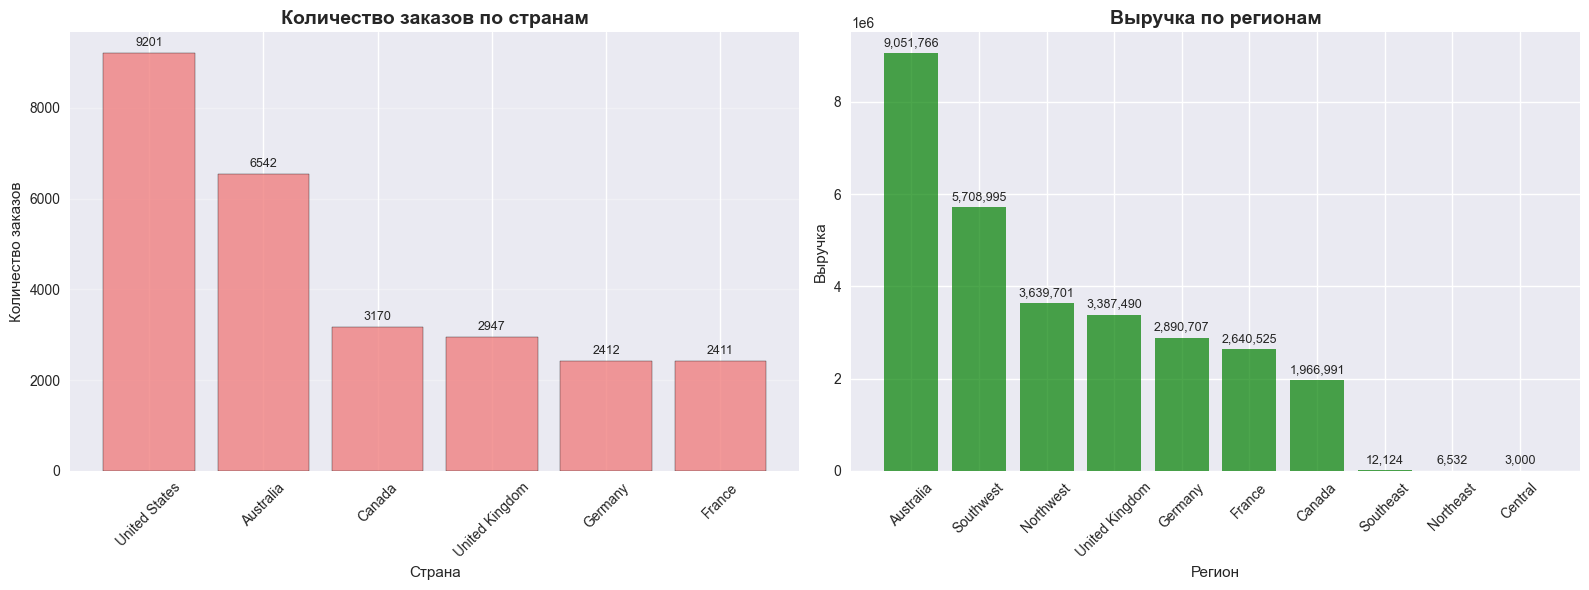

In [ ]:
import matplotlib.pyplot as plt

# Создаем сетку: 1 строка, 2 колонки
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 1. Количество заказов по странам
if 'Country' in df.columns and 'SalesOrderNumber' in df.columns:
    orders_by_country = df.groupby('Country')['SalesOrderNumber'].nunique().reset_index()
    orders_by_country.columns = ['Country', 'OrderCount']
    orders_by_country = orders_by_country.sort_values('OrderCount', ascending=False).head(10)  # топ-10

    ax1.bar(orders_by_country['Country'], orders_by_country['OrderCount'], 
            color='lightcoral', alpha=0.8, edgecolor='black')

    for i, (country, count) in enumerate(zip(orders_by_country['Country'], orders_by_country['OrderCount'])):
        ax1.text(i, count + max(orders_by_country['OrderCount']) * 0.01, 
                 f"{int(count)}", ha='center', va='bottom', fontsize=9)

    ax1.set_title('Количество заказов по странам', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Страна')
    ax1.set_ylabel('Количество заказов')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, axis='y', alpha=0.3)
    print("✅ Построен график: Количество заказов по странам")
else:
    ax1.text(0.5, 0.5, 'Нет данных\nCountry или SalesOrderNumber', 
             ha='center', va='center', transform=ax1.transAxes)
    ax1.set_title('Количество заказов по странам', fontsize=14, fontweight='bold')
    print("❌ Пропущен график: Отсутствует Country или SalesOrderNumber")

# 2. Выручка по регионам
if 'Region' in df.columns and 'SalesAmount' in df.columns:
    region_sales = df.groupby('Region')['SalesAmount'].sum().sort_values(ascending=False)

    ax2.bar(range(len(region_sales)), region_sales.values, color='green', alpha=0.7)

    for i, value in enumerate(region_sales.values):
        ax2.text(i, value + max(region_sales.values) * 0.01, 
                 f"{int(value):,}", ha='center', va='bottom', fontsize=9)

    ax2.set_title('Выручка по регионам', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Регион')
    ax2.set_ylabel('Выручка')
    ax2.set_xticks(range(len(region_sales)))
    ax2.set_xticklabels(region_sales.index, rotation=45)
    print(f"✅ Построен график: Выручка по регионам ({len(region_sales)} регионов)")
else:
    ax2.text(0.5, 0.5, 'Нет данных\nRegion или SalesAmount', 
             ha='center', va='center', transform=ax2.transAxes)
    ax2.set_title('Выручка по регионам', fontsize=14, fontweight='bold')
    print("❌ Пропущен график: Отсутствует Region или SalesAmount")

plt.tight_layout()
plt.show()

✅ Построен график: Количество заказов по странам
✅ Построен график: Количество заказов по регионам (10 регионов)
✅ Построен график: Выручка по странам
✅ Построен график: Выручка по регионам (10 регионов)


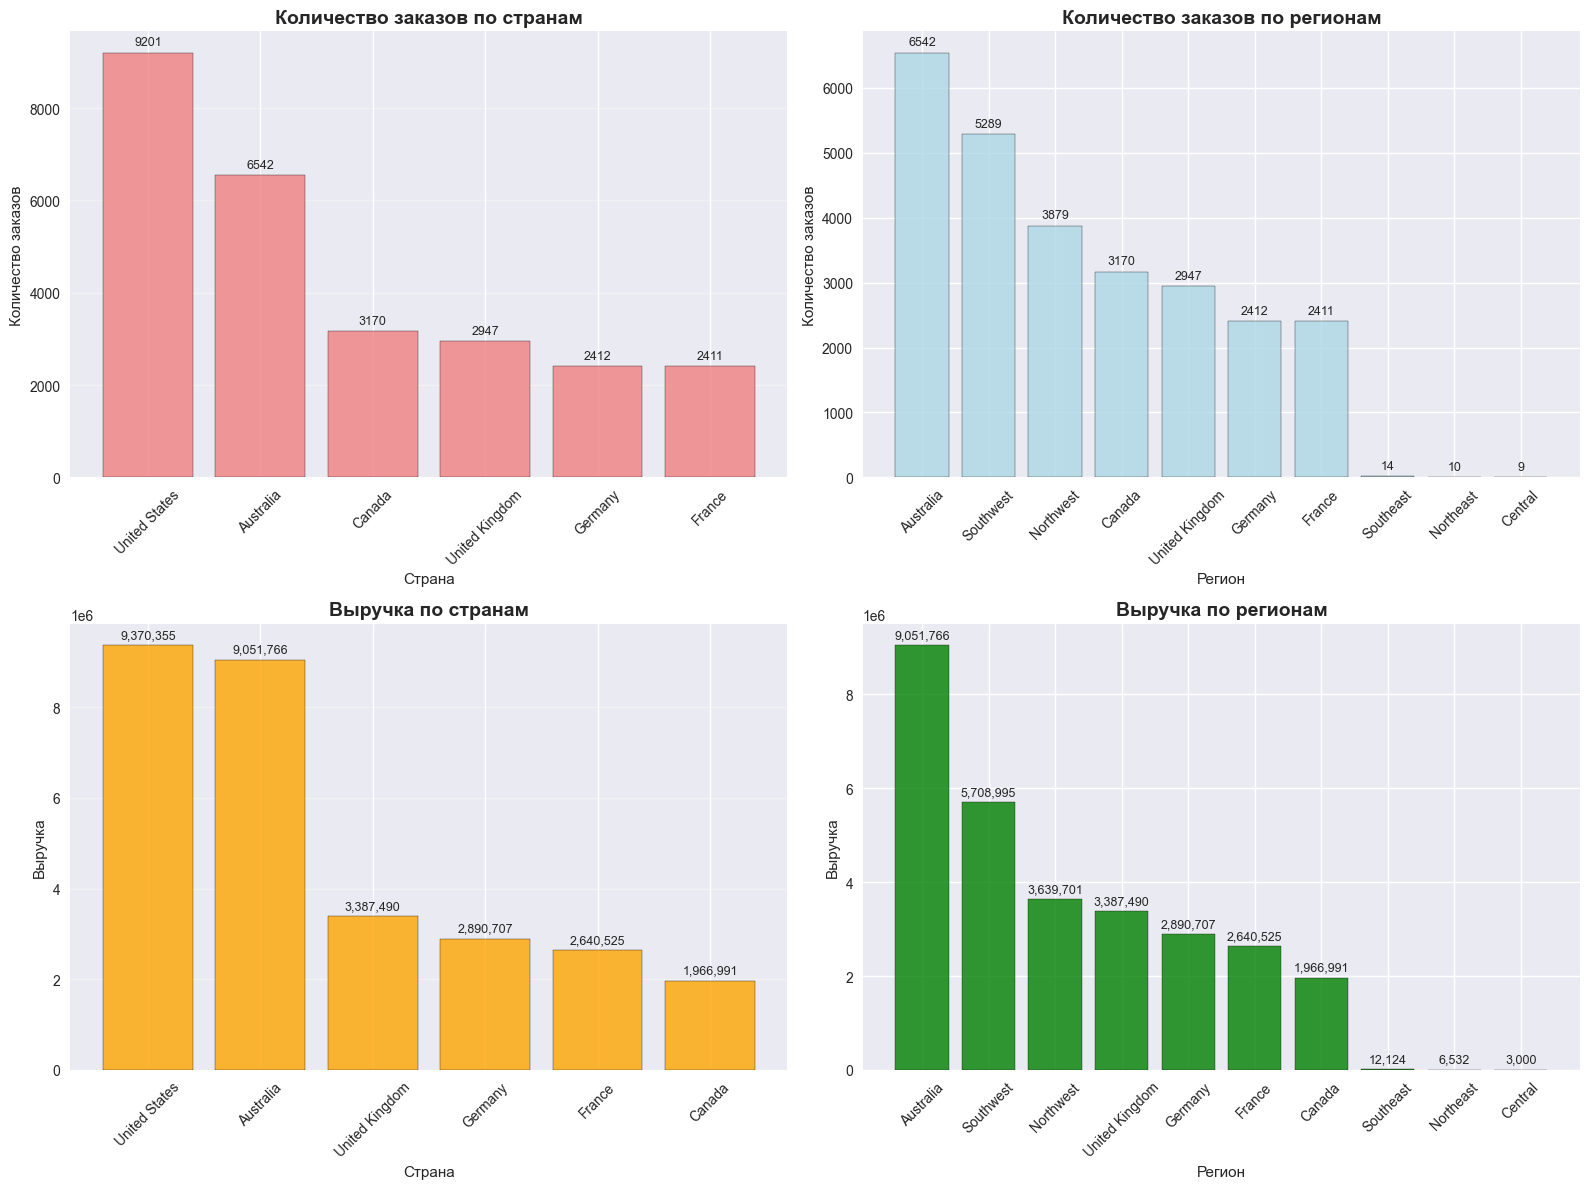

In [ ]:
# Создаем сетку: 2 строки, 2 колонки
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Количество заказов по странам
if 'Country' in df.columns and 'SalesOrderNumber' in df.columns:
    orders_by_country = df.groupby('Country')['SalesOrderNumber'].nunique().reset_index()
    orders_by_country.columns = ['Country', 'OrderCount']
    orders_by_country = orders_by_country.sort_values('OrderCount', ascending=False).head(10)

    ax1.bar(orders_by_country['Country'], orders_by_country['OrderCount'], 
            color='lightcoral', alpha=0.8, edgecolor='black')

    for i, (country, count) in enumerate(zip(orders_by_country['Country'], orders_by_country['OrderCount'])):
        ax1.text(i, count + max(orders_by_country['OrderCount']) * 0.01, 
                 f"{int(count)}", ha='center', va='bottom', fontsize=9)

    ax1.set_title('Количество заказов по странам', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Страна')
    ax1.set_ylabel('Количество заказов')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, axis='y', alpha=0.3)
    print("✅ Построен график: Количество заказов по странам")
else:
    ax1.text(0.5, 0.5, 'Нет данных\nCountry или SalesOrderNumber', 
             ha='center', va='center', transform=ax1.transAxes)
    ax1.set_title('Количество заказов по странам', fontsize=14, fontweight='bold')
    print("❌ Пропущен график: Отсутствует Country или SalesOrderNumber")

# 2. Количество заказов по регионам
if 'Region' in df.columns and 'SalesOrderNumber' in df.columns:
    orders_by_region = df.groupby('Region')['SalesOrderNumber'].nunique().reset_index()
    orders_by_region.columns = ['Region', 'OrderCount']
    orders_by_region = orders_by_region.sort_values('OrderCount', ascending=False)

    ax2.bar(range(len(orders_by_region)), orders_by_region['OrderCount'], 
            color='lightblue', alpha=0.8, edgecolor='black')

    for i, count in enumerate(orders_by_region['OrderCount']):
        ax2.text(i, count + max(orders_by_region['OrderCount']) * 0.01, 
                 f"{int(count)}", ha='center', va='bottom', fontsize=9)

    ax2.set_title('Количество заказов по регионам', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Регион')
    ax2.set_ylabel('Количество заказов')
    ax2.set_xticks(range(len(orders_by_region)))
    ax2.set_xticklabels(orders_by_region['Region'], rotation=45)
    print(f"✅ Построен график: Количество заказов по регионам ({len(orders_by_region)} регионов)")
else:
    ax2.text(0.5, 0.5, 'Нет данных\nRegion или SalesOrderNumber', 
             ha='center', va='center', transform=ax2.transAxes)
    ax2.set_title('Количество заказов по регионам', fontsize=14, fontweight='bold')
    print("❌ Пропущен график: Отсутствует Region или SalesOrderNumber")

# 3. Выручка по странам
if 'Country' in df.columns and 'SalesAmount' in df.columns:
    revenue_by_country = df.groupby('Country')['SalesAmount'].sum().reset_index()
    revenue_by_country = revenue_by_country.sort_values('SalesAmount', ascending=False).head(10)

    ax3.bar(revenue_by_country['Country'], revenue_by_country['SalesAmount'], 
            color='orange', alpha=0.8, edgecolor='black')

    for i, (country, amount) in enumerate(zip(revenue_by_country['Country'], revenue_by_country['SalesAmount'])):
        ax3.text(i, amount + max(revenue_by_country['SalesAmount']) * 0.01, 
                 f"{int(amount):,}", ha='center', va='bottom', fontsize=9)

    ax3.set_title('Выручка по странам', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Страна')
    ax3.set_ylabel('Выручка')
    ax3.tick_params(axis='x', rotation=45)
    ax3.grid(True, axis='y', alpha=0.3)
    print("✅ Построен график: Выручка по странам")
else:
    ax3.text(0.5, 0.5, 'Нет данных\nCountry или SalesAmount', 
             ha='center', va='center', transform=ax3.transAxes)
    ax3.set_title('Выручка по странам', fontsize=14, fontweight='bold')
    print("❌ Пропущен график: Отсутствует Country или SalesAmount")

# 4. Выручка по регионам
if 'Region' in df.columns and 'SalesAmount' in df.columns:
    revenue_by_region = df.groupby('Region')['SalesAmount'].sum().reset_index()
    revenue_by_region = revenue_by_region.sort_values('SalesAmount', ascending=False)

    ax4.bar(range(len(revenue_by_region)), revenue_by_region['SalesAmount'], 
            color='green', alpha=0.8, edgecolor='black')

    for i, amount in enumerate(revenue_by_region['SalesAmount']):
        ax4.text(i, amount + max(revenue_by_region['SalesAmount']) * 0.01, 
                 f"{int(amount):,}", ha='center', va='bottom', fontsize=9)

    ax4.set_title('Выручка по регионам', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Регион')
    ax4.set_ylabel('Выручка')
    ax4.set_xticks(range(len(revenue_by_region)))
    ax4.set_xticklabels(revenue_by_region['Region'], rotation=45)
    print(f"✅ Построен график: Выручка по регионам ({len(revenue_by_region)} регионов)")
else:
    ax4.text(0.5, 0.5, 'Нет данных\nRegion или SalesAmount', 
             ha='center', va='center', transform=ax4.transAxes)
    ax4.set_title('Выручка по регионам', fontsize=14, fontweight='bold')
    print("❌ Пропущен график: Отсутствует Region или SalesAmount")

plt.tight_layout()
plt.show()

✅ Построен график: Заказы по семейному положению
✅ Построен график: Заказы по наличию дома
✅ Построен график: Заказы по количеству детей


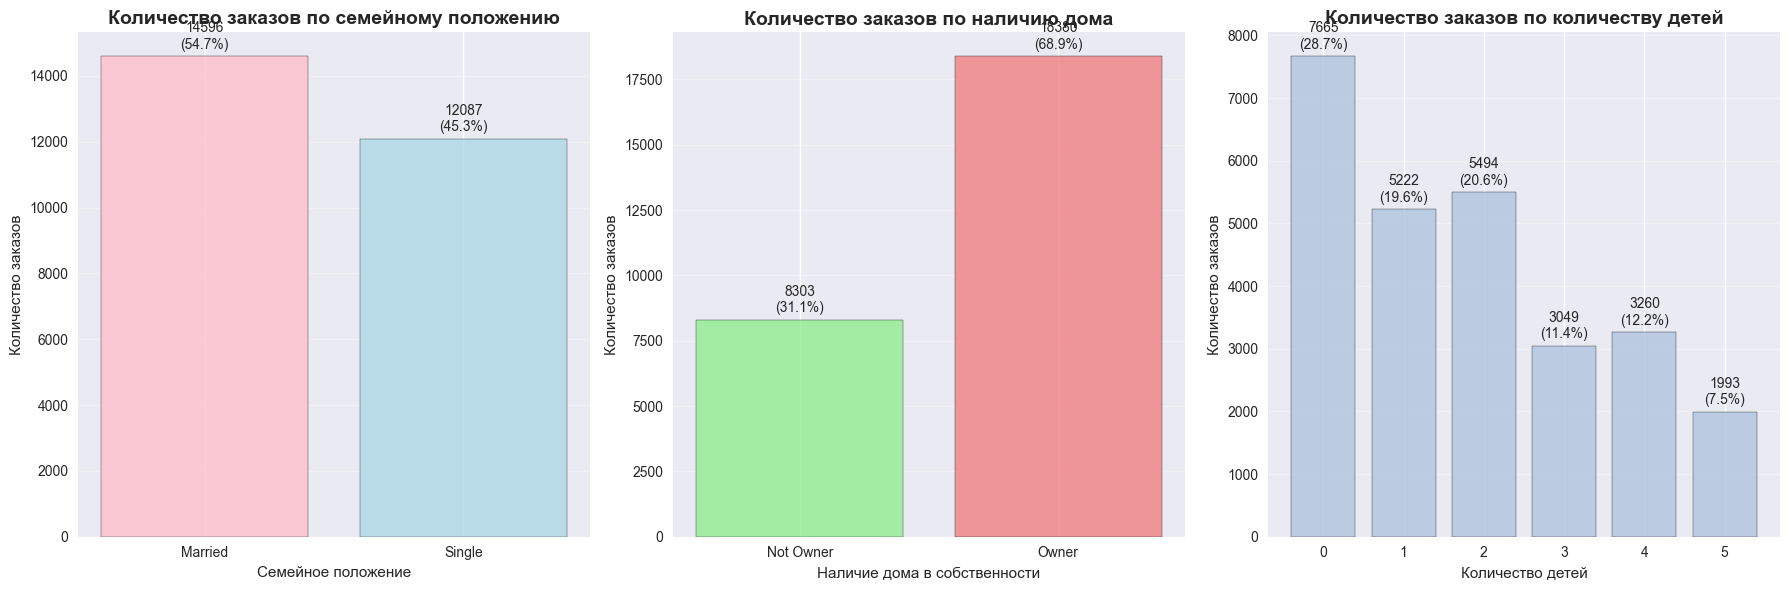

In [ ]:
# Создаем сетку: 1 строка, 3 колонки
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# 1. Количество заказов по семейному положению (MaritalStatus)
if 'MaritalStatus' in df.columns and 'SalesOrderNumber' in df.columns:
    orders_by_marital = df.groupby('MaritalStatus')['SalesOrderNumber'].nunique().reset_index()
    orders_by_marital.columns = ['MaritalStatus', 'OrderCount']
    total_orders_marital = orders_by_marital['OrderCount'].sum()
    orders_by_marital['Percentage'] = (orders_by_marital['OrderCount'] / total_orders_marital * 100).round(1)

    # Заменяем M -> Married, S -> Single
    orders_by_marital['MaritalStatus'] = orders_by_marital['MaritalStatus'].map({'M': 'Married', 'S': 'Single'})

    ax1.bar(orders_by_marital['MaritalStatus'], orders_by_marital['OrderCount'], 
            color=['pink', 'lightblue'], alpha=0.8, edgecolor='black')

    for i, (status, count, pct) in enumerate(zip(orders_by_marital['MaritalStatus'], 
                                                 orders_by_marital['OrderCount'], 
                                                 orders_by_marital['Percentage'])):
        ax1.text(i, count + max(orders_by_marital['OrderCount']) * 0.01, 
                 f"{int(count)}\n({pct}%)", ha='center', va='bottom', fontsize=10)

    ax1.set_title('Количество заказов по семейному положению', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Семейное положение')
    ax1.set_ylabel('Количество заказов')
    ax1.grid(True, axis='y', alpha=0.3)
    print("✅ Построен график: Заказы по семейному положению")
else:
    ax1.text(0.5, 0.5, 'Нет данных\nMaritalStatus или SalesOrderNumber', 
             ha='center', va='center', transform=ax1.transAxes)
    ax1.set_title('Количество заказов по семейному положению', fontsize=14, fontweight='bold')
    print("❌ Пропущен график: Отсутствует MaritalStatus или SalesOrderNumber")

# 2. Количество заказов по наличию дома (HouseOwnerFlag)
if 'HouseOwnerFlag' in df.columns and 'SalesOrderNumber' in df.columns:
    orders_by_house = df.groupby('HouseOwnerFlag')['SalesOrderNumber'].nunique().reset_index()
    orders_by_house.columns = ['HouseOwnerFlag', 'OrderCount']
    total_orders_house = orders_by_house['OrderCount'].sum()
    orders_by_house['Percentage'] = (orders_by_house['OrderCount'] / total_orders_house * 100).round(1)

    # Заменяем 1 -> Owner, 0 -> Not Owner
    orders_by_house['HouseOwnerFlag'] = orders_by_house['HouseOwnerFlag'].map({1: 'Owner', 0: 'Not Owner'})

    ax2.bar(orders_by_house['HouseOwnerFlag'], orders_by_house['OrderCount'], 
            color=['lightgreen', 'lightcoral'], alpha=0.8, edgecolor='black')

    for i, (status, count, pct) in enumerate(zip(orders_by_house['HouseOwnerFlag'], 
                                                 orders_by_house['OrderCount'], 
                                                 orders_by_house['Percentage'])):
        ax2.text(i, count + max(orders_by_house['OrderCount']) * 0.01, 
                 f"{int(count)}\n({pct}%)", ha='center', va='bottom', fontsize=10)

    ax2.set_title('Количество заказов по наличию дома', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Наличие дома в собственности')
    ax2.set_ylabel('Количество заказов')
    ax2.grid(True, axis='y', alpha=0.3)
    print("✅ Построен график: Заказы по наличию дома")
else:
    ax2.text(0.5, 0.5, 'Нет данных\nHouseOwnerFlag или SalesOrderNumber', 
             ha='center', va='center', transform=ax2.transAxes)
    ax2.set_title('Количество заказов по наличию дома', fontsize=14, fontweight='bold')
    print("❌ Пропущен график: Отсутствует HouseOwnerFlag или SalesOrderNumber")

# 3. Количество заказов по количеству детей (TotalChildren)
if 'TotalChildren' in df.columns and 'SalesOrderNumber' in df.columns:
    orders_by_children = df.groupby('TotalChildren')['SalesOrderNumber'].nunique().reset_index()
    orders_by_children.columns = ['TotalChildren', 'OrderCount']
    orders_by_children = orders_by_children.sort_values('TotalChildren')
    total_orders_children = orders_by_children['OrderCount'].sum()
    orders_by_children['Percentage'] = (orders_by_children['OrderCount'] / total_orders_children * 100).round(1)

    ax3.bar(orders_by_children['TotalChildren'].astype(str), orders_by_children['OrderCount'], 
            color='lightsteelblue', alpha=0.8, edgecolor='black')

    for i, (children, count, pct) in enumerate(zip(orders_by_children['TotalChildren'], 
                                                   orders_by_children['OrderCount'], 
                                                   orders_by_children['Percentage'])):
        ax3.text(i, count + max(orders_by_children['OrderCount']) * 0.01, 
                 f"{int(count)}\n({pct}%)", ha='center', va='bottom', fontsize=10)

    ax3.set_title('Количество заказов по количеству детей', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Количество детей')
    ax3.set_ylabel('Количество заказов')
    ax3.grid(True, axis='y', alpha=0.3)
    print("✅ Построен график: Заказы по количеству детей")
else:
    ax3.text(0.5, 0.5, 'Нет данных\nTotalChildren или SalesOrderNumber', 
             ha='center', va='center', transform=ax3.transAxes)
    ax3.set_title('Количество заказов по количеству детей', fontsize=14, fontweight='bold')
    print("❌ Пропущен график: Отсутствует TotalChildren или SalesOrderNumber")

plt.tight_layout()
plt.show()

In [ ]:
def save_cleaned_data(df):
    """Сохранение очищенного датасета"""
    df.to_csv('cleaned_sales_data.csv', index=False, encoding='utf-8')
    print("✅ Очищенные данные сохранены в 'cleaned_sales_data.csv'")

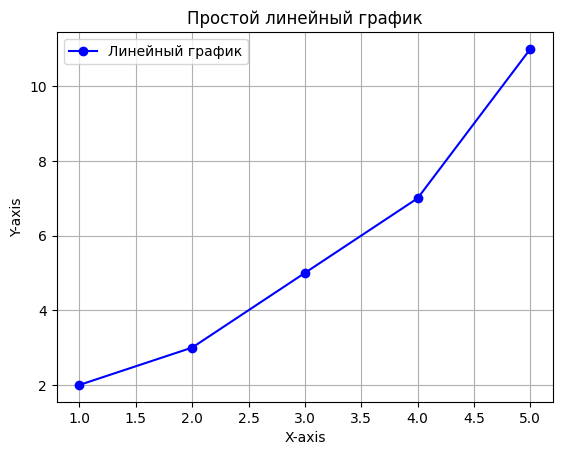

In [ ]:
import matplotlib.pyplot as plt

'''Данные'''
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

'''Создание линейного графика'''
plt.plot(x, y, marker='o', linestyle='-', color='b', label='Линейный график')
plt.title('Простой линейный график')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

'''Данные'''
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)

'''Настройка графика'''
plt.figure(figsize=(12, 6))

'''Первый график: синус'''
plt.subplot(2, 2, 1)
plt.plot(x, y1, color='blue', label='sin(x)', linewidth=2)
plt.title('График sin(x)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid()
plt.legend()

'''Второй график: косинус'''
plt.subplot(2, 2, 2)
plt.plot(x, y2, color='orange', label='cos(x)', linewidth=2)
plt.title('График cos(x)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid()
plt.legend()

'''Третий график: тангенс'''
plt.subplot(2, 1, 2)
plt.plot(x, y3, color='green', label='tan(x)', linewidth=2)
plt.ylim(-10, 10)
plt.title('График tan(x)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid()
plt.legend()

'''Добавление аннотаций'''
plt.annotate('Местоположение максимума', xy=(1.57, 10), xytext=(2, 8),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

'''Показать график'''
plt.tight_layout()
plt.show()

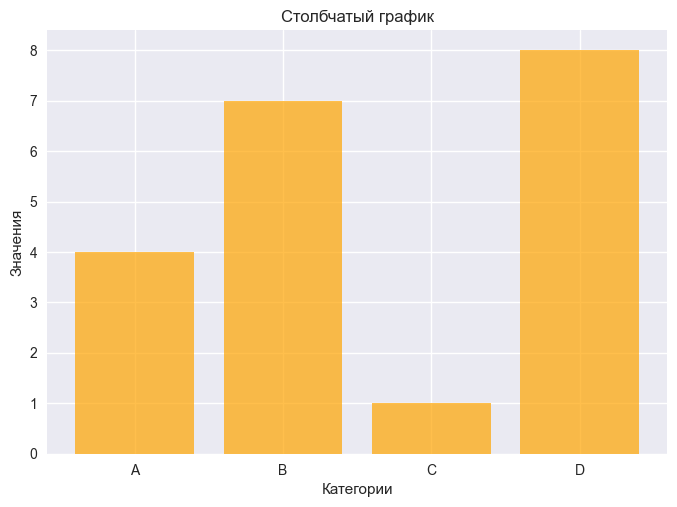

In [41]:
'''Данные'''
categories = ['A', 'B', 'C', 'D']
values = [4, 7, 1, 8]

'''Создание столбчатого графика'''
plt.bar(categories, values, color='orange', alpha=0.7)
plt.title('Столбчатый график')
plt.xlabel('Категории')
plt.ylabel('Значения')
plt.show()

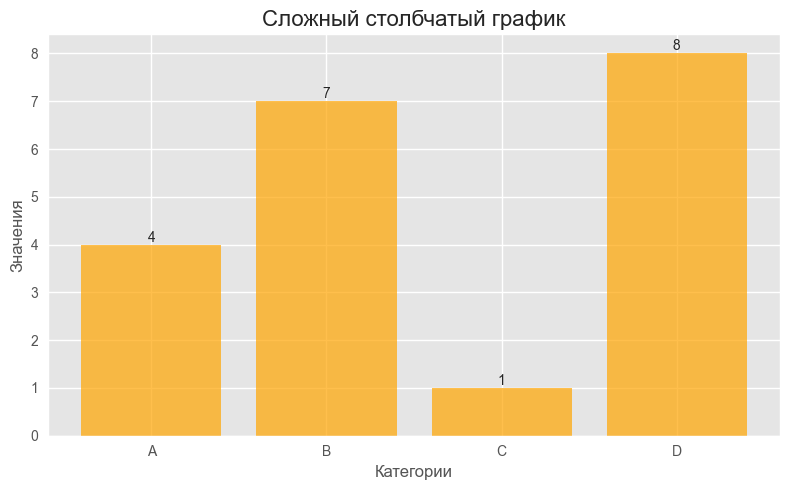

In [42]:
'''Данные'''
categories = ['A', 'B', 'C', 'D']
values = [4, 7, 1, 8]

'''Настройка стиля'''
plt.style.use('ggplot')

'''Создание фигуры и осей'''
fig, ax = plt.subplots(figsize=(8, 5))

'''Создание столбчатого графика'''
bars = ax.bar(categories, values, color='orange', alpha=0.7)

'''Добавление аннотаций'''
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, yval,
            ha='center', va='bottom', fontsize=10)

'''Настройка заголовков и меток'''
ax.set_title('Сложный столбчатый график', fontsize=16)
ax.set_xlabel('Категории', fontsize=12)
ax.set_ylabel('Значения', fontsize=12)

'''Добавление сетки'''
ax.yaxis.grid(True)

'''Показать график'''
plt.tight_layout()
plt.show()